In [1]:
ls

HW1/  HW2_2/            Q2.ipynb                        examples/
HW2/  Problem_32.ipynb  city_temperature_1995_2020.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('./city_temperature_1995_2020.csv') 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [5]:
## testing  ##
Dulu_df=df[df['City'].isin(['Duluth'])]
Hono_df=df[df['City'].isin(['Honolulu'])]

In [6]:
Dulu_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2096999,North America,US,Minnesota,Duluth,1,1,1995,8.2
2097000,North America,US,Minnesota,Duluth,1,2,1995,5.6
2097001,North America,US,Minnesota,Duluth,1,3,1995,-4.2
2097002,North America,US,Minnesota,Duluth,1,4,1995,-11.4
2097003,North America,US,Minnesota,Duluth,1,5,1995,3.7
...,...,...,...,...,...,...,...,...
2106259,North America,US,Minnesota,Duluth,5,9,2020,38.6
2106260,North America,US,Minnesota,Duluth,5,10,2020,40.5
2106261,North America,US,Minnesota,Duluth,5,11,2020,39.0
2106262,North America,US,Minnesota,Duluth,5,12,2020,41.5


In [12]:
def get_data(df,city):
    ndf=df[df['City'].isin([city])]
    series=ndf.set_index('Year')["AvgTemperature"]
    return series

D_df=get_data(df, "Duluth")
H_df=get_data(df, "Honolulu")

In [13]:
D_df

Year
1995     8.2
1995     5.6
1995    -4.2
1995   -11.4
1995     3.7
        ... 
2020    38.6
2020    40.5
2020    39.0
2020    41.5
2020    43.0
Name: AvgTemperature, Length: 9265, dtype: float64

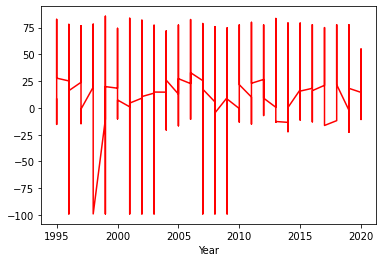

In [51]:
D_df.plot(style='r')
plt.show()

In [14]:
import numpy as np

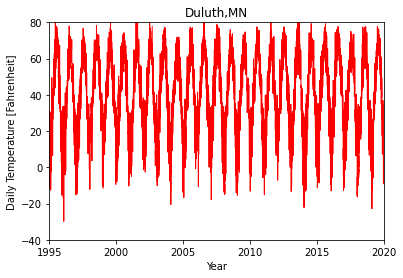

<Figure size 432x288 with 0 Axes>

In [45]:
dy=D_df.where(D_df> -90)
dx=1995+np.arange(len(dy))/365


ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("Daily Temperature [Fahrenheit]")
ax.axis ([1995, 2020, -40, 80]) #xmin, xmax, ymin, ymax
ax.plot(dx,dy,
        color='r',linewidth=1.0)
ax.set_title('Duluth,MN')
plt.show()
plt.savefig("Duluth_AvgTemp.png")

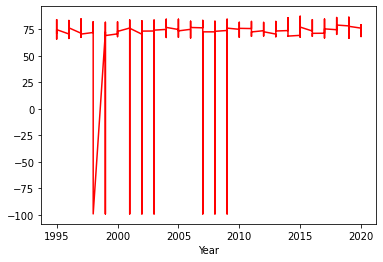

In [55]:
H_df.plot(style='r')
plt.show()

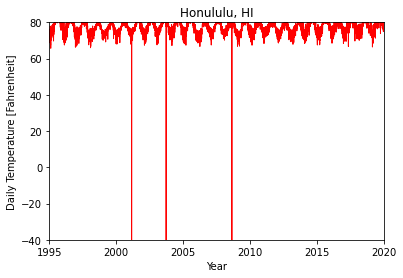

<Figure size 432x288 with 0 Axes>

In [20]:
hy=H_df.where(D_df> -90)
hx=1995+np.arange(len(hy))/365


plt.savefig("Duluth_AvgTemp.png")


ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("Daily Temperature [Fahrenheit]")
ax.axis ([1995, 2020, -40, 80]) #xmin, xmax, ymin, ymax
ax.plot(hx,hy,
        color='r',linewidth=1.0)
ax.set_title('Honululu, HI')
plt.show()
plt.savefig("Hono_AvgTemp.png")


Which city has less fluctuating temperatures across days of the year? Prove this by computing the first and the second moments of the data corresponding to the two cities and reporting them here.

In [42]:
print("Duluth")
print("mean temp:"+str(np.mean(dy)))
print("std temp:"+str(np.std(dy)))

Duluth
mean temp:40.411560506110085
std temp:21.379909275320767


In [43]:
print("Honolulu")
print("mean temp:"+str(np.mean(hy)))
print("std temp:"+str(np.std(hy)))

Honolulu
mean temp:77.31931437222883
std temp:4.649071189328853


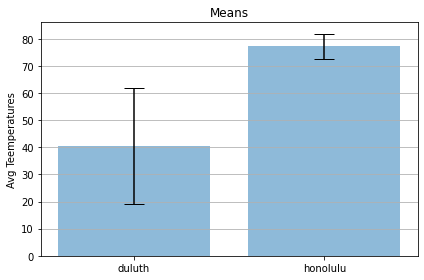

In [48]:
labels=['duluth', 'honolulu']
x_pos=np.arange(len(labels))
means=[np.mean(dy),np.mean(hy)]
stds=[np.std(dy),np.std(hy)]


fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stds,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Avg Teemperatures')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Means')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


Error Bars: 
 - a short Error Bar shows that values are concentrated, signalling that the plotted average value is more likely, while a long Error Bar would indicate that the values are more spread out and less reliable.

Base on time series plots and error bars, it can be seen how temperatures acrros the days of the year fluctuates less in Honolulu than Duluth.  

In [ ]:
#Goal: return a subset with only data of input two cities
#example cities: duluth and honolulu
#extract values for temp  and year
#graph with given axis and center 0
#x- year, y-temp
------
#first two moments: mean and std